# 업무자동화를 위한 파이썬 입문 CAMP #12-05


> 주제 : mp3 파일에 저장되어 있는 태그를 바탕으로 파일 이름을 일괄적으로 변경하기

## Prerequisite

#### Python Packages

```
$ pip install mutagen
```

In [ ]:
# 이 부분은 제가 강의자료의 실습 데이터를 만들기 위해서 사용한 스크립트입니다.
# 수업 시간에는 이 부분에 대해서 다루고 넘어가지는 않습니다.

"""
import os
import string
import shutil
import random


# 기존에 다운로드한 원본 MP3 파일 목록 가져오기
mp3_files = [
    filename
    for filename 
    in os.listdir("sample_mp3_original")
    if ".mp3" in filename
]


# 기존의 sample_mp3 폴더 삭제하기
if os.path.exists("sample_mp3"):
    shutil.rmtree('sample_mp3')


# sample_mp3 라는 새로운 폴더 생성하기
os.makedirs("sample_mp3")

    
# sample_mp3 라는 새로운 폴더에 이상한 이름으로 새로운 mp3 파일들 생성하기
for mp3_file in mp3_files:
    random_filename = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(8)) + ".mp3"
    shutil.copy2(
        "sample_mp3_original/" + mp3_file,
        "sample_mp3/" + random_filename,
    )

# sample_mp3.zip 으로 압축하기
shutil.make_archive("sample_mp3", 'zip', "sample_mp3")


# sample_mp3 폴더 삭제하기
shutil.rmtree("sample_mp3")
"""

In [1]:
import os
import shutil

# 파이썬에서 mp3와 관련된 모듈은 굉장히 많습니다.
# 이러한 경우에는 직접 검색해서 어떤 모듈을 이용해야 가장 생산성 높게 작업할 수 있을지 고민해보아야 합니다.
from mutagen.mp3 import MP3

In [2]:
# "sample_mp3" 라는 폴더에다 "sample_mp3.zip"의 압축파일을 푼다.

shutil.unpack_archive("sample_mp3.zip", "sample_mp3", "zip")

In [3]:
# 새로운 mp3 파일들을 저장할 폴더를 생성한다.
# 만약에 이미 존재하면, 삭제하고 새롭게 폴더를 생성한다.

if os.path.exists("sample_mp3_processed"):
    shutil.rmtree('sample_mp3_processed')
os.makedirs("sample_mp3_processed")

In [4]:
# "sample_mp3" 라는 폴더 안에 들어있는 각각의 mp3 파일들에 대해서, 
# 제목, 가수명을 추출한다.

for mp3_filename in os.listdir("sample_mp3"):
    mp3 = MP3("sample_mp3/" + mp3_filename)
    
    title = mp3.get("TIT2").text[0]
    artist = mp3.get("TPE1").text[0]
    
    new_filename = "{artist} - {title}.mp3".format(
        artist=artist,
        title=title,
    )
    
    # 이름 바꾸기
    shutil.copy2(
        "sample_mp3/" + mp3_filename,
        "sample_mp3_processed/" + new_filename, 
    )

## Bonus: manage data with pandas

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(columns=["filename", "title", "artist", "length"])

In [7]:
for mp3_filename in os.listdir("sample_mp3_processed"):
    mp3 = MP3("sample_mp3_processed/" + mp3_filename)
    
    title = mp3.get("TIT2").text[0]
    artist = mp3.get("TPE1").text[0]
    length = mp3.info.length
    
    df.loc[len(df)] = [mp3_filename, title, artist, length]

In [8]:
df

,filename,title,artist,length
0,Drake - Hotline Bling.mp3,Hotline Bling,Drake,267.023958
1,Fetty Wap - 679 (feat. Remy Boyz).mp3,679 (feat. Remy Boyz),Fetty Wap,196.693333
2,Justin Bieber - What Do You Mean.mp3,What Do You Mean,Justin Bieber,210.096979
3,Major Lazer x DJ Snake ft. Mø - Lean on.mp3,Lean on,Major Lazer x DJ Snake ft. Mø,176.640000
4,OMI - Cheerleader.mp3,Cheerleader,OMI,181.440000
5,R. City - Locked Away (feat. Adam Levine).mp3,Locked Away (feat. Adam Levine),R. City,227.280000
6,Selena Gomez (feat. A$AP Rocky) - Good For You...,Good For You,Selena Gomez (feat. A$AP Rocky),220.734688
7,Silento - Watch Me.mp3,Watch Me,Silento,186.280229
8,The Weeknd - Can't Feel My Face.mp3,Can't Feel My Face,The Weeknd,215.625771
9,The Weeknd - The Hills.mp3,The Hills,The Weeknd,242.290521


In [9]:
# pandas 는 다양한 함수를 지원합니다. - 예, "length" column 의 평균 ( 즉, 평균 음원 길이 )를 구하고 싶다면,
# mean() 이라는 함수를 사용해주시면 됩니다.

df.length.mean()

212.41054791666664

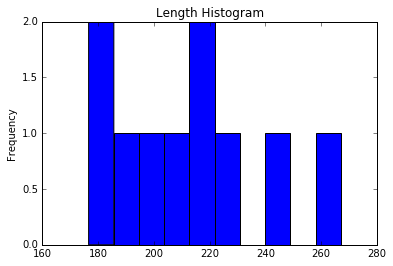

In [10]:
# Visualization / 시각화
# Reference: http://pandas.pydata.org/pandas-docs/stable/visualization.html 

plt.figure()
df.length.plot(
    kind="hist",
).set_title("Length Histogram")

In [ ]:
# 결과를 엑셀 파일로 저장

df.to_excel("music.xlsx", index=False)